In [1]:
import os
import sys
import gc
# assuming data, models, engine in flicc directory:
flicc_path = os.path.realpath("__file__").split('grid_search')[0]
sys.path.append(flicc_path)
import torch
from data import ClimateDataset
from models import ClassificationModel
from engine import Engine

In [2]:
model_checkpoint='microsoft/deberta-base'

In [3]:
results = {'test_acc':[],
           'test_f1':[],
           'eval_acc':[],
           'eval_f1':[],
           'lr':[]}

In [4]:
learning_rates = [1.0e-5, 5.0e-5 ,1.0e-4]

for lr in learning_rates:
    print(f'Grid search {model_checkpoint}, learning rate {lr}')
    data = ClimateDataset(model_to_train=1,model_checkpoint=model_checkpoint,dataset_url=flicc_path,batch_size=32)
    data.setup_dataloaders()
    model = ClassificationModel(model_checkpoint=data.model_checkpoint,num_labels=data.num_labels)
    trainer = Engine(epochs=30,labels=data.labels)
    trainer.model = model.model
    trainer.device = model.device
    test_acc, test_f1, eval_acc, eval_f1 = trainer.run(lr=lr,
                                                       wd=0.0,
                                                       train_dataloader=data.train_dataloader,
                                                       eval_dataloader=data.eval_dataloader,
                                                       test_dataloader=data.test_dataloader,
                                                       early_stop=3)
    results['test_acc'].append(test_acc)
    results['test_f1'].append(test_f1)
    results['eval_acc'].append(eval_acc)
    results['eval_f1'].append(eval_f1)
    results['lr'].append(lr)
    print('### '*10)
    print(results)
    print('### '*10)
    with torch.no_grad():
        torch.cuda.empty_cache()
    del data, model, trainer, test_acc, test_f1, eval_acc, eval_f1
    gc.collect()

Grid search microsoft/deberta-base, learning rate 1e-05


Map:   0%|          | 0/1796 [00:00<?, ? examples/s]

Map:   0%|          | 0/256 [00:00<?, ? examples/s]

Map:   0%|          | 0/457 [00:00<?, ? examples/s]

Some weights of DebertaForSequenceClassification were not initialized from the model checkpoint at microsoft/deberta-base and are newly initialized: ['classifier.weight', 'classifier.bias', 'pooler.dense.bias', 'pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
You're using a DebertaTokenizerFast tokenizer. Please note that with a fast tokenizer, using the `__call__` method is faster than using a method to encode the text followed by a call to the `pad` method to get a padded encoding.


1 / 30: Train Loss:	0.5518	Val Loss:	0.4740	Accuracy:	0.7834	F1:	0.6590
2 / 30: Train Loss:	0.4234	Val Loss:	0.3983	Accuracy:	0.8249	F1:	0.7209
3 / 30: Train Loss:	0.3022	Val Loss:	0.3819	Accuracy:	0.8556	F1:	0.7903
4 / 30: Train Loss:	0.1827	Val Loss:	0.4040	Accuracy:	0.8643	F1:	0.8030
5 / 30: Train Loss:	0.1165	Val Loss:	0.4796	Accuracy:	0.8578	F1:	0.8023
6 / 30: Train Loss:	0.0904	Val Loss:	0.7063	Accuracy:	0.7921	F1:	0.7655
7 / 30: Train Loss:	0.0933	Val Loss:	0.5466	Accuracy:	0.8293	F1:	0.7932
No improvement for 3 epochs. Stopping early.
best (higgest macro f1-score) val results:
              precision    recall  f1-score   support

       bknow       0.84      0.59      0.69       119
      struct       0.87      0.96      0.91       338

    accuracy                           0.86       457
   macro avg       0.86      0.77      0.80       457
weighted avg       0.86      0.86      0.86       457

test results:
              precision    recall  f1-score   support

       bknow

Map:   0%|          | 0/256 [00:00<?, ? examples/s]

Some weights of DebertaForSequenceClassification were not initialized from the model checkpoint at microsoft/deberta-base and are newly initialized: ['classifier.weight', 'classifier.bias', 'pooler.dense.bias', 'pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
You're using a DebertaTokenizerFast tokenizer. Please note that with a fast tokenizer, using the `__call__` method is faster than using a method to encode the text followed by a call to the `pad` method to get a padded encoding.


1 / 30: Train Loss:	0.4899	Val Loss:	0.3848	Accuracy:	0.8162	F1:	0.7652
2 / 30: Train Loss:	0.3062	Val Loss:	0.4293	Accuracy:	0.8249	F1:	0.7897
3 / 30: Train Loss:	0.2231	Val Loss:	0.3774	Accuracy:	0.8665	F1:	0.8202
4 / 30: Train Loss:	0.1149	Val Loss:	0.5005	Accuracy:	0.8140	F1:	0.7761
5 / 30: Train Loss:	0.0446	Val Loss:	0.8013	Accuracy:	0.7352	F1:	0.7095
6 / 30: Train Loss:	0.0579	Val Loss:	0.7334	Accuracy:	0.7659	F1:	0.7341
No improvement for 3 epochs. Stopping early.
best (higgest macro f1-score) val results:
              precision    recall  f1-score   support

       bknow       0.77      0.69      0.73       119
      struct       0.89      0.93      0.91       338

    accuracy                           0.87       457
   macro avg       0.83      0.81      0.82       457
weighted avg       0.86      0.87      0.86       457

test results:
              precision    recall  f1-score   support

       bknow       0.60      0.61      0.61        67
      struct       0.86      0

Map:   0%|          | 0/457 [00:00<?, ? examples/s]

Some weights of DebertaForSequenceClassification were not initialized from the model checkpoint at microsoft/deberta-base and are newly initialized: ['classifier.weight', 'classifier.bias', 'pooler.dense.bias', 'pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
You're using a DebertaTokenizerFast tokenizer. Please note that with a fast tokenizer, using the `__call__` method is faster than using a method to encode the text followed by a call to the `pad` method to get a padded encoding.


1 / 30: Train Loss:	0.5335	Val Loss:	0.4544	Accuracy:	0.7637	F1:	0.7220
2 / 30: Train Loss:	0.3815	Val Loss:	0.3671	Accuracy:	0.8315	F1:	0.7730
3 / 30: Train Loss:	0.1899	Val Loss:	0.4481	Accuracy:	0.7921	F1:	0.7476
4 / 30: Train Loss:	0.1465	Val Loss:	0.7956	Accuracy:	0.7812	F1:	0.5732
5 / 30: Train Loss:	0.1785	Val Loss:	0.3647	Accuracy:	0.8403	F1:	0.7873
6 / 30: Train Loss:	0.0612	Val Loss:	1.0487	Accuracy:	0.7549	F1:	0.7299
7 / 30: Train Loss:	0.0728	Val Loss:	0.9324	Accuracy:	0.7724	F1:	0.7428
8 / 30: Train Loss:	0.0504	Val Loss:	0.6766	Accuracy:	0.8403	F1:	0.7720
No improvement for 3 epochs. Stopping early.
best (higgest macro f1-score) val results:
              precision    recall  f1-score   support

       bknow       0.71      0.66      0.68       119
      struct       0.88      0.91      0.89       338

    accuracy                           0.84       457
   macro avg       0.80      0.78      0.79       457
weighted avg       0.84      0.84      0.84       457

test resu

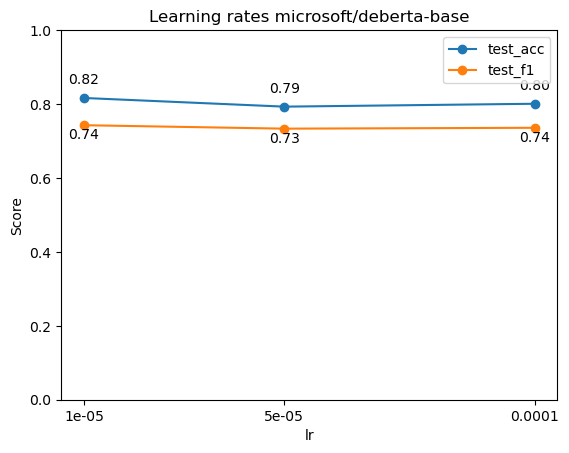

In [5]:
Engine.plot_grid_search(df=results,
                        title=f'Learning rates {model_checkpoint}',
                        column='lr',
                        sci_format=False)

In [ ]:
%reset -f